# STEP 1. PRE-PROJECT

In [1]:
#https://www.kaggle.com/code/dafolabi/loan-default-risk-prediction-using-ml

## 1. Descriptive analysis of  our data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
df = pd.read_csv("Loan_default.csv")

In [3]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

total_missing = df.isnull().sum().sum()
print(f"Total missing values in dataset: {total_missing}")
print(f"Percentage of missing data: {(total_missing / (df.shape[0] * df.shape[1])) * 100:.4f}%")


Number of rows: 255347
Number of columns: 18
Total missing values in dataset: 0
Percentage of missing data: 0.0000%


In [4]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols = [col for col in cat_cols if col.lower() != 'loanid']

In [5]:
'''for col in cat_cols:
    counts = df[col].value_counts(dropna=False)
    percentages = df[col].value_counts(normalize=True, dropna=False)*100
    dist = pd.DataFrame({
        'Category': counts.index,
        'Count': counts.values,
        'Percentage (%)': percentages.round(2)
    })
    print(dist.head(10).to_string(index=False))

    plt.figure(figsize=(8,4))
    sns.barplot(data=dist.head(10), x='Category', y='Count', color='skyblue', legend=False)
    plt.title(f"Distribution of {col}", fontsize=12)
    plt.ylabel("Count")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
'''

'for col in cat_cols:\n    print(f"=== Distribution of \'{col}\' ===")\n    counts = df[col].value_counts(dropna=False)\n    percentages = df[col].value_counts(normalize=True, dropna=False) * 100\n    dist = pd.DataFrame({\n        \'Category\': counts.index,\n        \'Count\': counts.values,\n        \'Percentage (%)\': percentages.round(2)\n    })\n    print(dist.head(10).to_string(index=False), "\n")\n\n    plt.figure(figsize=(8,4))\n    sns.barplot(data=dist.head(10), x=\'Category\', y=\'Count\', color=\'skyblue\', legend=False)\n    plt.title(f"Distribution of {col}", fontsize=12)\n    plt.ylabel("Count")\n    plt.xlabel(col)\n    plt.xticks(rotation=45)\n    plt.tight_layout()\n    plt.show()\n    print("\n")'

In [6]:
'''for col in num_cols:
    counts, bins = np.histogram(df[col].dropna(), bins=10)
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, color='steelblue')
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
'''

'for col in num_cols:\n    counts, bins = np.histogram(df[col].dropna(), bins=10)\n    plt.figure(figsize=(6,4))\n    sns.histplot(df[col], kde=True, color=\'steelblue\')\n    plt.title(f\'Distribution of {col}\', fontsize=12)\n    plt.xlabel(col)\n    plt.ylabel(\'Count\')\n    plt.tight_layout()\n    plt.show()\n    print("\n")'

         Category   Count  Percentage (%)
Default                                  
0               0  225694           88.39
1               1   29653           11.61 



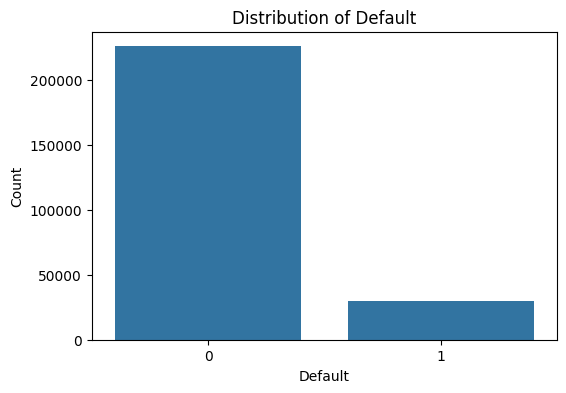

In [7]:
target_col = 'Default'

counts = df[target_col].value_counts()
percentages = df[target_col].value_counts(normalize=True) * 100
dist = pd.DataFrame({
    'Category': counts.index,
    'Count': counts.values,
    'Percentage (%)': percentages.round(2)
})
print(dist)
print("\n")

plt.figure(figsize=(6,4))
sns.countplot(x=target_col, data=df)
plt.title('Distribution of Default')
plt.ylabel('Count')
plt.xlabel(target_col)
plt.show()

The dataset is highly imbalanced, with most loans being non-default.
This imbalance should be considered during model selection and evaluation.

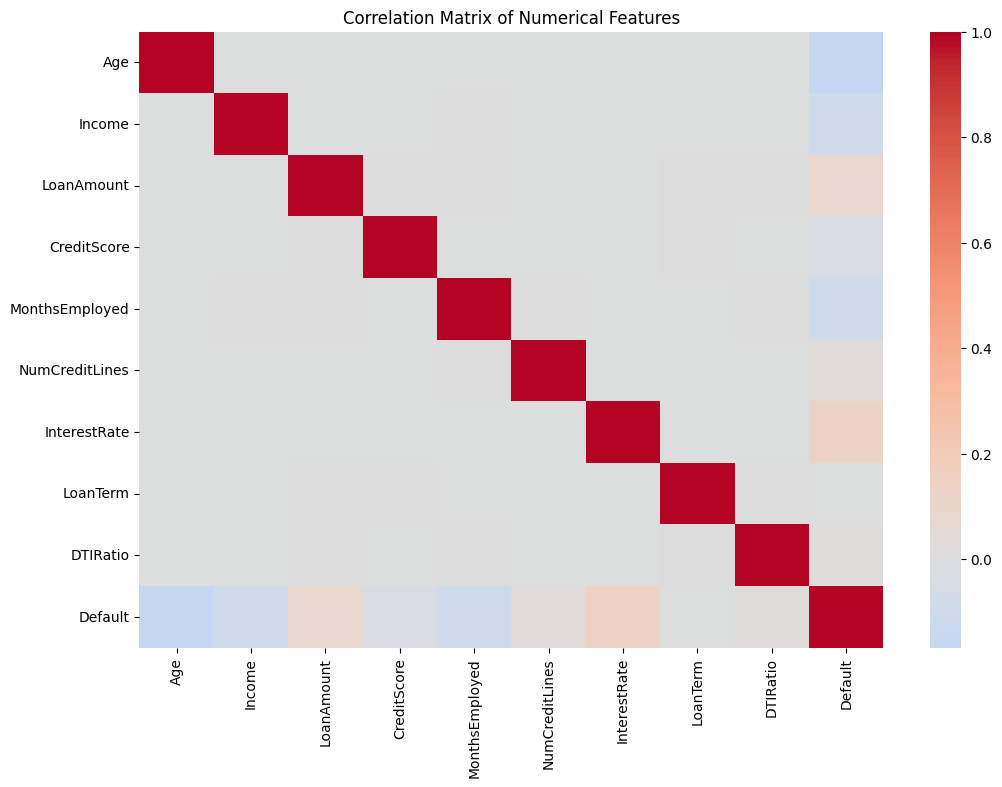

In [8]:
plt.figure(figsize=(12,8))
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr = df[num_cols].corr()
sns.heatmap(corr, cmap='coolwarm', annot=False, center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [9]:
'''for col in num_cols:
    if col != target_col:
        plt.figure(figsize=(6,4))
        sns.boxplot(x=target_col, y=col, data=df)
        plt.title(f'{col} vs {target_col}')
        plt.tight_layout()
        plt.show()
'''

'for col in num_cols:\n    if col != target_col:\n        plt.figure(figsize=(6,4))\n        sns.boxplot(x=target_col, y=col, data=df)\n        plt.title(f\'{col} vs {target_col}\')\n        plt.tight_layout()\n        plt.show()\n        print("\n")\n'

In [10]:
'''cat_cols = df.select_dtypes(include=['object']).columns
cat_cols = [col for col in cat_cols if col.lower() != 'loanid']

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(
        x=col,
        hue=target_col,
        data=df,
        palette={0:'skyblue', 1:'salmon'},
        dodge=True
    )
    plt.title(f'{col} vs {target_col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
'''

'cat_cols = df.select_dtypes(include=[\'object\']).columns\ncat_cols = [col for col in cat_cols if col.lower() != \'loanid\']\n\nfor col in cat_cols:\n    plt.figure(figsize=(8,4))\n    sns.countplot(\n        x=col,\n        hue=target_col,\n        data=df,\n        palette={0:\'skyblue\', 1:\'salmon\'},\n        dodge=True\n    )\n    plt.title(f\'{col} vs {target_col}\')\n    plt.xticks(rotation=45)\n    plt.tight_layout()\n    plt.show()\n    print("\n")'

## 2. Implementation of the necessary pre-processing

In [11]:
import pandas as pd
import numpy as np
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


### 1. Removal of unnecessary columns

LoanID is an irrelevant column, as it does not provide any meaningful information.

EmploymentType: this column appears less useful, since we already have access to the Income variable. Employment type is therefore somewhat redundant and less precise. For now, we will keep it just in case, and later compare model accuracy with and without this column.

All the remaining columns seem important to keep.

In [12]:
df.drop(columns=['LoanID'], inplace=True)

### 2. Removal of missing or duplicated values

We observed that there are no missing values in the dataset.

In [13]:
print(df.isna().sum())
print("\n--------------------------------------------\n")
print("\n--------------------------------------------\n")
print("\n--------------------------------------------\n")
print(df.isna().any(axis = 1).sum())
print("\n--------------------------------------------\n")
print("\n--------------------------------------------\n")
print("\n--------------------------------------------\n")
print(df.duplicated().sum())

Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

--------------------------------------------


--------------------------------------------


--------------------------------------------

0

--------------------------------------------


--------------------------------------------


--------------------------------------------

0


### 3. Conversion of boolean columns into binary variables

This concerns the following columns: HasMortgage, HasDependents, and HasCoSigner.

In [14]:
bool_cols = ['HasMortgage', 'HasDependents', 'HasCoSigner']
for col in bool_cols:
    df[col] = df[col].map({'Yes':1, 'No':0})

### 4. Encoding of categorical variables

We create dummy variables for the following categorical features: MaritalStatus, EmploymentType, and LoanPurpose.

In [15]:
print(df['Education'].unique())

["Bachelor's" "Master's" 'High School' 'PhD']


Transformation of the categorical variable "Education"

We notice that this categorical column will not be easily handled by our model, so we will transform it into a numerical column, which is much simpler and more practical for the model to work with.

In [16]:
education_years = {
    "High School": 0,
    "Bachelor's": 3,
    "Master's": 5,
    "PhD": 8
}
df["EducationYears"] = df["Education"].map(education_years).fillna(0).astype(int)
df = df.drop(columns=["Education"])
print(df.head())

   Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0   56   85994       50587          520              80               4   
1   69   50432      124440          458              15               1   
2   46   84208      129188          451              26               3   
3   32   31713       44799          743               0               3   
4   60   20437        9139          633               8               4   

   InterestRate  LoanTerm  DTIRatio EmploymentType MaritalStatus  HasMortgage  \
0         15.23        36      0.44      Full-time      Divorced            1   
1          4.81        60      0.68      Full-time       Married            0   
2         21.17        24      0.31     Unemployed      Divorced            1   
3          7.07        24      0.23      Full-time       Married            0   
4          6.51        48      0.73     Unemployed      Divorced            0   

   HasDependents LoanPurpose  HasCoSigner  Default  EducationY

### 5. Normalization of our data

Several columns are numerical, and we need to normalize them in order to apply certain algorithms that require standardized values.
However, we did not normalize all of our data.

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols= ['Age', 'Income', 'LoanAmount', 'InterestRate']

df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,EducationYears
0,0.833990,0.089693,-1.086833,520,80,4,0.261771,36,0.44,Full-time,Divorced,1,1,Other,1,0,3
1,1.701221,-0.823021,-0.044309,458,15,1,-1.308350,60,0.68,Full-time,Married,0,0,Other,1,0,5
2,0.166888,0.043854,0.022715,451,26,3,1.156831,24,0.31,Unemployed,Divorced,1,1,Auto,0,1,5
3,-0.767053,-1.303452,-1.168538,743,0,3,-0.967805,24,0.23,Full-time,Married,0,0,Business,0,0,0
4,1.100830,-1.592855,-1.671921,633,8,4,-1.052188,48,0.73,Unemployed,Divorced,0,1,Auto,0,0,3


## 3. Formalisation of the problem



### 3.1 Introduction

Access to credit is the fundament of modern economic development:
whether it is for housing, entrepreneurship, or personal projects,
credit stimulates growth by lubricating capital across households,
businesses, and financial institutions.
But every loan that has been approved poses a risk—the risk of non-repayment.
The risk of loan default is a very vital concern for banks and other credit
institutions because, when defaulted, it directly affects profitability,
stability, and long-term viability.
Traditional credit risk assessment has relied on either expert judgment
or static rule-based systems.
In the modern environment of heightened data and an increasingly
complex borrower profile, these methods fall woefully short. This has enforced
the use of machine learning methods to model and estimate the probability of a
 loan default with better precision, scalability, and objectivity.

### 3.2 Context and Link to the Project
"""


The dataset we used in this project contains detailed information about individual
 loan applicants, combining both demographic and financial attributes.
Each record represents a borrower, described by variables that reflect their
creditworthiness, financial stability, and personal situation.

The main input variables are:

- LoanID – (it is unique id  for each loan application)
- Age
- Income (aanual)
- LoanAmount
- CreditScore
- MonthsEmployed
- NumCreditLines
- InterestRate
- LoanTerm
- DTIRatio
- Education
- EmploymentType
- MaritalStatus
- HasMortgage
- HasDependents
- LoanPurpose
- HasCoSigner

The target variable is:
- Default – binary indicator  so (1 = applicant defaulted, 0 = applicant repaid successfully).
These features capture both financial capacity
and personal context  providing a comprehensive view of the applicant’s risk profile.

Therefore the goal of this project is to use these variables to train a machine learning model
capable of predicting the probability of loan default,
thereby improving decision-making and reducing credit risk for financial institutions.

"""

### 3.3 Problem Statement
Problematic
How can we predict, based on an applicant’s socio-economic and financial profile,
the probability that they will default on their loan,
in order to help financial institutions make safer and more data-driven credit decisions?"""

This problem involves multiple dimensions:
"""
- Technical: that's the fact of managing mixed and incomplete data;
- Economic: it is the fact that we need to  minimizing losses caused
by defaults while maintaining sufficient lending volume;
- Ethical: the  ensuring fairness and avoiding discrimination in automated decisions.

### 3.4. Project Objective  
The main goal of this project is to build a machine learning model capable of estimating the probability that a loan applicant will default on their loan, denoted as P(Y = 1 | X). Here, we have Y (VAR) represents the target variable: Y = 1 means the applicant defaults on the loan, Y = 0 means the applicant repays successfully. X represents all the input variables that we have allready describing in the 3.2 . In simple terms, the objective is to train a model that learns the relationship between these features and the likelihood of default. Once trained, this model can be integrated into an automated credit assessment system to support decision-making, reduce financial losses, and improve the overall accuracy of credit risk evaluation.

### 3.5. Mathematical Formalization

The model learns from past loan data where the outcome (default or not) is known.  
It identifies patterns linking applicant features to the probability of default.  
Once trained, it can estimate the likelihood of default for new applicants to support
 credit decisions.

### 3.6. Constraints, Challenges and Baseline Model

"Constraints"
- Class imbalance: there are always fewer defaults compared to successful loans
- Data Quality: Missing values, outliers, mixed variable types

- Interpretability: Financial models should be explainable, transparent.
"Challenges"
- Achieve high predictive accuracy without overfitting

- Treatment of heterogeneous data (numerical + categorical)
- Fairness, lack of bias in predictions
"Base Model "
For the first stage, we have used a "Logistic Regression*"model. Simple to interpret and an easy model to provide a direct estimate of P(Y = 1 | X), it's a strong baseline before testing more complex models.


### 3.7. Summary

 The key focus of this project is to model the probability of loan default.
 using applicant-level socio-economic and financial data by a binary classification framework.
 The best result would be to have a strong, interpretable, and ethical model. It helps financial
 institutions get accurate credit risk profiling and make responsible lending decisions.

## 4. Selection of baseline model and implementation of the model

Baseline model

We decided to use Logistic Regression as our baseline model, and we applied it accordingly.

In [18]:
X = df.drop(columns=["Default"])
y = df["Default"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
categorical_cols = ['EmploymentType', 'MaritalStatus', 'LoanPurpose']

X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='outer', axis=1, fill_value=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)

X_test_scaled = scaler.transform(X_test_encoded)

In [21]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

In [22]:
print("Baseline Model: Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Baseline Model: Logistic Regression
Accuracy: 0.8858037987076561

Confusion Matrix:
 [[45045   125]
 [ 5707   193]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.61      0.03      0.06      5900

    accuracy                           0.89     51070
   macro avg       0.75      0.51      0.50     51070
weighted avg       0.86      0.89      0.84     51070



# STEP 2. COMPLETE DATA PRE-PROCESSING

Now, we build a clean and consistent preprocessing pipeline and fix the limitations of the initial prototype.

### 0. Reload clean dataset

In [23]:
df2 = pd.read_csv("Loan_default.csv")

df2 = df2.drop(columns=["LoanID"])

### 1. Manage of missing data

In [24]:
missing_per_column = df2.isna().sum()
print("Missing values per column:\n", missing_per_column)

print("\nTotal missing values in the dataset:", df2.isna().sum().sum())

Missing values per column:
 Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

Total missing values in the dataset: 0


We confirm that there are no missing values in the dataset, so no imputation is required at this stage.

### 2. Gestion of the outliers

In our case, we need to predict anormal values, extreme events. THis is why it is not a good idea to supress the outliers: the default loan often come from those values. Instead, we can use the z-score to have an idea on the outliers and their impact.

In [25]:
from scipy.stats import zscore

num_cols_step2 = df2.select_dtypes(include=['int64', 'float64']).columns.drop("Default")
z_scores = np.abs(zscore(df2[num_cols_step2]))
outlier_counts = (z_scores > 3).sum(axis=0)

print("Number of z > 3 per numerical feature:\n")
for col, count in zip(num_cols_step2, outlier_counts):
    print(f"{col}: {count}")

Number of z > 3 per numerical feature:

Age: 0
Income: 0
LoanAmount: 0
CreditScore: 0
MonthsEmployed: 0
NumCreditLines: 0
InterestRate: 0
LoanTerm: 0
DTIRatio: 0


### 3. Feature encoding

As in the pre project:

We encode the categorical vairables : the boolean ones are transformed into binary ones.
We encode the "education_years" column, and delete the original column education. We have a new column of education years instead of a categorical one.


In [26]:
bool_cols = ['HasMortgage', 'HasDependents', 'HasCoSigner']
for col in bool_cols:
    df2[col] = df2[col].map({'Yes': 1, 'No': 0})
education_years = {
    "High School": 0,
    "Bachelor's": 3,
    "Master's": 5,
    "PhD": 8
}
df2["EducationYears"] = df2["Education"].map(education_years).astype(int)
df2 = df2.drop(columns=["Education"])

cat_cols_step2 = df2.select_dtypes(include=['object']).columns

As we can see, 3 columns are still objects : we need to apply the one hot via GetDummies :  

In [27]:
df2 = pd.get_dummies(df2, columns=['EmploymentType', 'MaritalStatus', 'LoanPurpose'])

In [28]:
print(df2.head())

   Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0   56   85994       50587          520              80               4   
1   69   50432      124440          458              15               1   
2   46   84208      129188          451              26               3   
3   32   31713       44799          743               0               3   
4   60   20437        9139          633               8               4   

   InterestRate  LoanTerm  DTIRatio  HasMortgage  ...  \
0         15.23        36      0.44            1  ...   
1          4.81        60      0.68            0  ...   
2         21.17        24      0.31            1  ...   
3          7.07        24      0.23            0  ...   
4          6.51        48      0.73            0  ...   

   EmploymentType_Self-employed  EmploymentType_Unemployed  \
0                         False                      False   
1                         False                      False   
2                   

Now, we have our dataset, cleaned, encoded. We need however to apply a scaling in order not to import abusive importance to one column (for example income vs age).

### 4. Train/test split

We now perform a stratified train-test split to keep the same default / non-default proportion in both sets.

In [29]:
from sklearn.model_selection import train_test_split

X2 = df2.drop(columns=["Default"])
y2 = df2["Default"]

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2,
    test_size=0.2,
    random_state=42,
    stratify=y2
)

print("Train shape:", X2_train.shape)
print("Test shape:", X2_test.shape)


Train shape: (204277, 25)
Test shape: (51070, 25)


### 5. Feature Scaling

We perform feature scaling only on the training set and apply the same transformation to the test set. This prevents the scaler from learning information from the test data, which would artificially improve evaluation metrics.

In [30]:
num_cols = X2_train.select_dtypes(include=['int64','float64']).columns
print(num_cols)



Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'HasMortgage',
       'HasDependents', 'HasCoSigner', 'EducationYears'],
      dtype='object')


In [31]:
cols_to_scale = [
    'Age', 'Income', 'LoanAmount', 'CreditScore',
    'MonthsEmployed', 'NumCreditLines', 'InterestRate',
    'LoanTerm', 'DTIRatio', 'EducationYears'
]

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X2_train[cols_to_scale] = scaler.fit_transform(X2_train[cols_to_scale])

X2_test[cols_to_scale] = scaler.transform(X2_test[cols_to_scale])

Now we are ready to test our first models, and then, improve them to get better results !

# STEP 3. STANDARD MODELS

## 3.1 Baselines (Without SMOTE, imbalanced data)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Baseline 1 : Logistic regression

In [34]:
logreg = LogisticRegression(max_iter=2000)
logreg.fit(X2_train, y2_train)

y_pred_lr = logreg.predict(X2_test)

print("Accuracy:", accuracy_score(y2_test, y_pred_lr))
print("\nClassification report:\n", classification_report(y2_test, y_pred_lr))
print("\nConfusion matrix:\n", confusion_matrix(y2_test, y_pred_lr))

Accuracy: 0.8852359506559624

Classification report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45139
           1       0.61      0.03      0.06      5931

    accuracy                           0.89     51070
   macro avg       0.75      0.52      0.50     51070
weighted avg       0.85      0.89      0.84     51070


Confusion matrix:
 [[45009   130]
 [ 5731   200]]


### Baseline 2 : KNN

In [35]:
# knn = KNeighborsClassifier(n_neighbors=1)
# knn.fit(X2_train, y2_train)

# y_pred_knn = knn.predict(X2_test)

# print("Accuracy:", accuracy_score(y2_test, y_pred_knn))
# print("\nClassification report:\n", classification_report(y2_test, y_pred_knn))
# print("\nConfusion matrix:\n", confusion_matrix(y2_test, y_pred_knn))

### Baseline 3 : Decision tree

In [36]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X2_train, y2_train)

y_pred_tree = tree.predict(X2_test)

print("Accuracy:", accuracy_score(y2_test, y_pred_tree))
print("\nClassification report:\n", classification_report(y2_test, y_pred_tree))
print("\nConfusion matrix:\n", confusion_matrix(y2_test, y_pred_tree))

Accuracy: 0.8024476209124731

Classification report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89     45139
           1       0.20      0.23      0.21      5931

    accuracy                           0.80     51070
   macro avg       0.55      0.55      0.55     51070
weighted avg       0.82      0.80      0.81     51070


Confusion matrix:
 [[39626  5513]
 [ 4576  1355]]


In [37]:
#print(classification_report(y2_test, y_pred_knn))

### Baseline 4 : Naive Bayes

In [38]:
nb = GaussianNB()
nb.fit(X2_train, y2_train)

y_pred_nb = nb.predict(X2_test)

print("Accuracy:", accuracy_score(y2_test, y_pred_nb))
print("\nClassification report:\n", classification_report(y2_test, y_pred_nb))
print("\nConfusion matrix:\n", confusion_matrix(y2_test, y_pred_nb))

Accuracy: 0.8849422361464656

Classification report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45139
           1       0.59      0.03      0.06      5931

    accuracy                           0.88     51070
   macro avg       0.74      0.51      0.50     51070
weighted avg       0.85      0.88      0.84     51070


Confusion matrix:
 [[45010   129]
 [ 5747   184]]


### Baseline 5 :  SVM Linear

In [39]:
svm_lin = LinearSVC()
svm_lin.fit(X2_train, y2_train)

y_pred_svm_lin = svm_lin.predict(X2_test)

print("Accuracy:", accuracy_score(y2_test, y_pred_svm_lin))
print("\nClassification report:\n", classification_report(y2_test, y_pred_svm_lin))
print("\nConfusion matrix:\n", confusion_matrix(y2_test, y_pred_svm_lin))

Accuracy: 0.8838652829449775

Classification report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     45139
           1       0.00      0.00      0.00      5931

    accuracy                           0.88     51070
   macro avg       0.44      0.50      0.47     51070
weighted avg       0.78      0.88      0.83     51070


Confusion matrix:
 [[45139     0]
 [ 5931     0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Cross - validation

## 3.2 Baseline with SMOTE (balanced dataset)

We apply SMOTE on our data once, on the training set obviously :

In [40]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X2_train_res, y2_train_res = sm.fit_resample(X2_train, y2_train)

In [41]:
print("Classes before SMOTE:", y2_train.value_counts())
print("Classes after SMOTE:", y2_train_res.value_counts())

Classes before SMOTE: Default
0    180555
1     23722
Name: count, dtype: int64
Classes after SMOTE: Default
0    180555
1    180555
Name: count, dtype: int64


In [42]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "SVM Linear": LinearSVC()
}

for name, model in models.items():
    print(f"\n{name} avec SMOTE ")
    model.fit(X2_train_res, y2_train_res)
    y_pred = model.predict(X2_test)

    print("Accuracy:", accuracy_score(y2_test, y_pred))
    print(classification_report(y2_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y2_test, y_pred))



Logistic Regression avec SMOTE 
Accuracy: 0.8229293127080478
              precision    recall  f1-score   support

           0       0.92      0.88      0.90     45139
           1       0.31      0.41      0.35      5931

    accuracy                           0.82     51070
   macro avg       0.61      0.65      0.62     51070
weighted avg       0.85      0.82      0.83     51070

Confusion Matrix:
 [[39576  5563]
 [ 3480  2451]]

Decision Tree avec SMOTE 
Accuracy: 0.7547483845701978
              precision    recall  f1-score   support

           0       0.90      0.81      0.85     45139
           1       0.19      0.33      0.24      5931

    accuracy                           0.75     51070
   macro avg       0.54      0.57      0.55     51070
weighted avg       0.82      0.75      0.78     51070

Confusion Matrix:
 [[36574  8565]
 [ 3960  1971]]

Naive Bayes avec SMOTE 
Accuracy: 0.7212649304875661
              precision    recall  f1-score   support

           0       

## 3.3 Hyperparameters tunning

We will now apply GridSearch on our 2 best models (with SMOTE obviously, which give more accuracy): the SVM and the decision tree.

1. Decision Tree with GridSearch

In [43]:
from sklearn.model_selection import GridSearchCV

param_grid_tree = {
    'max_depth': [2,5],
    'min_samples_split': [2,3,7],
    'min_samples_leaf': [1,2,4]
}

grid_tree = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_tree,
    cv=2,
    scoring='recall',
    n_jobs=-1
)

grid_tree.fit(X2_train_res, y2_train_res)

print("Best DT params:", grid_tree.best_params_)

best_tree = grid_tree.best_estimator_
y_pred_tree = best_tree.predict(X2_test)
print(classification_report(y2_test, y_pred_tree))

Best DT params: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.93      0.63      0.75     45139
           1       0.19      0.64      0.29      5931

    accuracy                           0.63     51070
   macro avg       0.56      0.64      0.52     51070
weighted avg       0.84      0.63      0.70     51070



## 3.4 Error analysis

### 1. Overfitting / underfitting on the decision tree

In [44]:
from sklearn.metrics import accuracy_score, recall_score

y_pred_train = best_tree.predict(X2_train_res)
y_pred_test = best_tree.predict(X2_test)

print("TRAIN recall:", recall_score(y2_train_res, y_pred_train))
print("TEST recall:", recall_score(y2_test, y_pred_test))

print("TRAIN accuracy:", accuracy_score(y2_train_res, y_pred_train))
print("TEST accuracy:", accuracy_score(y2_test, y_pred_test))

TRAIN recall: 0.7319099443382903
TEST recall: 0.6361490473781825
TRAIN accuracy: 0.6841322588684888
TEST accuracy: 0.6349716075974153


The model exhibits moderate overfitting, with a 10% decrease in recall between training and testing datasets. However, recall remains sufficiently high on unseen data, indicating good generalization.

### 2. Learning curves

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
   

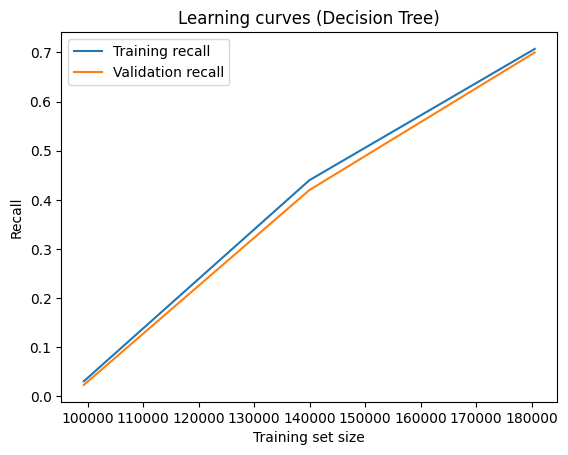

In [45]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    best_tree,
    X2_train_res, y2_train_res,
    cv=2,
    scoring='recall'
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label='Training recall')
plt.plot(train_sizes, test_mean, label='Validation recall')
plt.xlabel('Training set size')
plt.ylabel('Recall')
plt.legend()
plt.title('Learning curves (Decision Tree)')
plt.show()

The learning curves show convergence between training and validation performance, suggesting limited overfitting. The model generalizes reasonably well and continues to learn as more data is added. The decision tree demonstrates good recall on defaulters, which meets our application goal.

### 3. Feature importance

In [46]:
feature_importances = pd.Series(best_tree.feature_importances_, index=X2_train_res.columns)
feature_importances.sort_values(ascending=False).head(15)

,0
Age,0.388180
InterestRate,0.204155
HasCoSigner,0.137332
HasDependents,0.125398
Income,0.086723
MonthsEmployed,0.023487
LoanAmount,0.023342
HasMortgage,0.011383
CreditScore,0.000000
DTIRatio,0.000000


The model assigns the highest importance to Age and InterestRate. This suggests that these variables capture more predictive risk signal than classical indicators such as CreditScore or DTIRatio within this dataset.

The fact that CreditScore has near-zero importance implies that its risk-related effect is likely absorbed indirectly by other correlated features, such as InterestRate or HasCoSigner.

Limiting max_depth to 5 forces the model to select only the strongest global splits, which explains the suppression of lower-level features.

### 4. Analyze of errors of class 1

In [47]:
fn_indices = (y2_test == 1) & (y_pred_tree == 0)
df_fn = df2.iloc[X2_test.index[fn_indices]]
df_fn

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,HasMortgage,...,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
96397,21,61259,66180,458,9,2,5.40,24,0.73,1,...,False,False,False,True,False,True,False,False,False,False
177709,27,125389,137059,307,54,2,5.76,48,0.57,1,...,False,False,True,False,False,False,False,True,False,False
153421,19,28903,63502,490,61,2,10.84,24,0.68,1,...,False,False,False,False,True,False,False,False,False,True
80388,64,138491,154960,533,23,4,3.74,60,0.67,0,...,False,False,False,True,False,False,False,False,False,True
82358,40,122906,85219,455,48,2,7.54,36,0.58,1,...,True,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206236,20,23483,221108,578,33,1,8.79,36,0.65,1,...,False,False,True,False,False,False,False,False,False,True
154299,50,85490,101299,820,1,3,13.25,24,0.62,1,...,True,False,True,False,False,False,False,False,True,False
183255,29,55791,179057,343,3,4,13.32,48,0.89,1,...,False,False,False,True,False,False,False,False,False,True
68319,55,19037,79009,829,5,3,5.98,60,0.45,1,...,False,False,False,True,False,False,True,False,False,False


## 3.5 Comparison of models with and without SMOTE

In [48]:
from sklearn.metrics import precision_score, recall_score, f1_score
results_baseline = {}
def evaluate_model(name, y_true, y_pred):
    return {
        "precision_1": precision_score(y_true, y_pred, pos_label=1, zero_division=0),
        "recall_1": recall_score(y_true, y_pred, pos_label=1, zero_division=0),
        "f1_1": f1_score(y_true, y_pred, pos_label=1, zero_division=0),
        "accuracy": accuracy_score(y_true, y_pred)
    }

results_baseline["Logistic Regression (No SMOTE)"] = evaluate_model("LR_no_smote", y2_test, y_pred_lr)
results_baseline["SVM Linear (No SMOTE)"] = evaluate_model("SVM_no_smote", y2_test, y_pred_svm_lin)

results_baseline["Logistic Regression (SMOTE)"] = evaluate_model("LR_smote", y2_test, models["Logistic Regression"].predict(X2_test))
results_baseline["SVM Linear (SMOTE)"] = evaluate_model("SVM_smote", y2_test, models["SVM Linear"].predict(X2_test))

comparison_df = pd.DataFrame(results_baseline).T
print("Baseline Comparison (with vs without SMOTE)")
display(comparison_df)

Baseline Comparison (with vs without SMOTE)


,precision_1,recall_1,f1_1,accuracy
Logistic Regression (No SMOTE),0.606061,0.033721,0.063888,0.885236
SVM Linear (No SMOTE),0.000000,0.000000,0.000000,0.883865
Logistic Regression (SMOTE),0.305840,0.413252,0.351524,0.822929
SVM Linear (SMOTE),0.306956,0.405497,0.349412,0.824633


Here we got a problem : as some models didn't predict any 1st class, we encountered a zero division error. Adding "zero_division=0" allows to skip this error.

As we can see, the smote improves a lot results.

We can also plot the ROC curve :

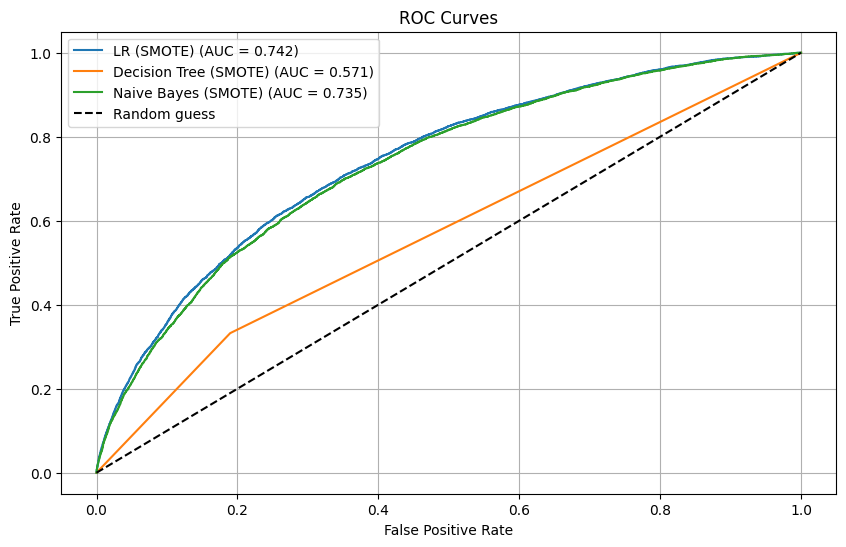

In [49]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curves(model_dict, X_test, y_test):
    plt.figure(figsize=(10, 6))

    for name, model in model_dict.items():
        if hasattr(model, "predict_proba"):
            y_scores = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, "decision_function"):
            y_scores = model.decision_function(X_test)
        else:
            continue

        fpr, tpr, _ = roc_curve(y_test, y_scores)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

    plt.plot([0, 1], [0, 1], "k--", label="Random guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves")
    plt.legend()
    plt.grid(True)
    plt.show()

baseline_models_smote = {
    "LR (SMOTE)": models["Logistic Regression"],
    "Decision Tree (SMOTE)": models["Decision Tree"],
    "Naive Bayes (SMOTE)": models["Naive Bayes"],
}

plot_roc_curves(baseline_models_smote, X2_test, y2_test)


# STEP 4. ADVANCED MODELS

## 4.1 Ensemble learning

### 1. Bagging Classifier : Decision tree

In [50]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


We take our best tree :

In [51]:
base_tree = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

In [52]:
bagging_dt = BaggingClassifier(
    estimator=base_tree,
    n_estimators=10,
    max_samples=1.0,
    max_features=1.0,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

We train the model on our data with smote :

In [53]:
bagging_dt.fit(X2_train_res, y2_train_res)
y_pred_bagging_dt = bagging_dt.predict(X2_test)

In [54]:
print("Bagging Decision Tree results: ")
print("Accuracy:", accuracy_score(y2_test, y_pred_bagging_dt))
print(classification_report(y2_test, y_pred_bagging_dt))
print("Confusion Matrix:\n", confusion_matrix(y2_test, y_pred_bagging_dt))

Bagging Decision Tree results: 
Accuracy: 0.6641472488740944
              precision    recall  f1-score   support

           0       0.93      0.67      0.78     45139
           1       0.20      0.64      0.31      5931

    accuracy                           0.66     51070
   macro avg       0.57      0.65      0.54     51070
weighted avg       0.85      0.66      0.72     51070

Confusion Matrix:
 [[30142 14997]
 [ 2155  3776]]


Bagging Decision Trees improved overall accuracy(3%) while keeping a very high recall on the minority class (around 0.64). This shows that Bagging successfully reduces variance and increases model stability. However, the improvement is moderate because the base estimator is a shallow tree (max_depth=5), which limits the gain in expressiveness.

### 2. Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rf = RandomForestClassifier(
    n_estimators=50,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

rf.fit(X2_train_res, y2_train_res)
y_pred_rf = rf.predict(X2_test)

In [57]:
print("Random Forest")
print("Accuracy:", accuracy_score(y2_test, y_pred_rf))
print(classification_report(y2_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y2_test, y_pred_rf))


Random Forest
Accuracy: 0.8546308987663991
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     45139
           1       0.33      0.24      0.28      5931

    accuracy                           0.85     51070
   macro avg       0.62      0.59      0.60     51070
weighted avg       0.84      0.85      0.84     51070

Confusion Matrix:
 [[42223  2916]
 [ 4508  1423]]


Random Forest achieved a very high accuracy (85%) and very strong performance on the majority class. However, its recall for the minority class remained low (24%).
This indicates that Random Forest is not well suited for detecting defaulters, even after oversampling with SMOTE.

### 3. Gradient boosting

In [58]:
from sklearn.ensemble import GradientBoostingClassifier

In [59]:
gb = GradientBoostingClassifier(
    n_estimators=50,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gb.fit(X2_train_res, y2_train_res)
y_pred_gb = gb.predict(X2_test)


In [60]:
print("Gradient Boosting")
print("Accuracy:", accuracy_score(y2_test, y_pred_gb))
print(classification_report(y2_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y2_test, y_pred_gb))


Gradient Boosting
Accuracy: 0.7858429606422557
              precision    recall  f1-score   support

           0       0.93      0.82      0.87     45139
           1       0.27      0.49      0.35      5931

    accuracy                           0.79     51070
   macro avg       0.60      0.66      0.61     51070
weighted avg       0.85      0.79      0.81     51070

Confusion Matrix:
 [[37219  7920]
 [ 3017  2914]]


### 4. Voting Classifier

In [61]:
from sklearn.ensemble import VotingClassifier

In [62]:
dt = best_tree
gb = gb
rf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
rf.fit(X2_train_res, y2_train_res)

voting_clf = VotingClassifier(
    estimators=[
        ('dt', dt),
        ('gb', gb),
        ('rf', rf)
    ],
    voting='soft'
)

voting_clf.fit(X2_train_res, y2_train_res)

y_pred_voting = voting_clf.predict(X2_test)


In [63]:
print("=== Voting Classifier (Soft) ===")
print("Accuracy:", accuracy_score(y2_test, y_pred_voting))
print(classification_report(y2_test, y_pred_voting))
print("Confusion Matrix:\n", confusion_matrix(y2_test, y_pred_voting))

=== Voting Classifier (Soft) ===
Accuracy: 0.7930291756412767
              precision    recall  f1-score   support

           0       0.92      0.84      0.88     45139
           1       0.27      0.45      0.33      5931

    accuracy                           0.79     51070
   macro avg       0.59      0.64      0.61     51070
weighted avg       0.84      0.79      0.81     51070

Confusion Matrix:
 [[37855  7284]
 [ 3286  2645]]


The soft voting classifier averages the probabilities produced by the three models (Decision Tree, Random Forest, Gradient Boosting).
As expected, the ensemble achieves performance that lies between its components: more stable than a single tree, more balanced than Random Forest, and slightly less sensitive to the minority class than Gradient Boosting.

### 5. XGBoost

In [64]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

In [65]:
xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=2,
    learning_rate=0.01,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X2_train_res, y2_train_res)
y_pred_xgb = xgb_model.predict(X2_test)

In [66]:
print("Accuracy:", accuracy_score(y2_test, y_pred_xgb))
print("")
print(classification_report(y2_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y2_test, y_pred_xgb))

Accuracy: 0.6809672997846093

              precision    recall  f1-score   support

           0       0.93      0.69      0.79     45139
           1       0.21      0.64      0.32      5931

    accuracy                           0.68     51070
   macro avg       0.57      0.66      0.55     51070
weighted avg       0.85      0.68      0.74     51070

Confusion Matrix:
 [[31003 14136]
 [ 2157  3774]]


In [67]:
params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9]
}

random_search = RandomizedSearchCV(
    xgb.XGBClassifier(random_state=42, n_jobs=-1, objective='binary:logistic'),
    param_distributions=params,
    n_iter=5,
    scoring='recall',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

print("Optimisation du XGBoost en cours...")
random_search.fit(X2_train_res, y2_train_res)

print(f"Meilleurs paramètres : {random_search.best_params_}")
best_xgb = random_search.best_estimator_

Optimisation du XGBoost en cours...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Meilleurs paramètres : {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1}


=== Feature Importance (XGBoost) ===


/tmp/ipython-input-1408423894.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="magma")


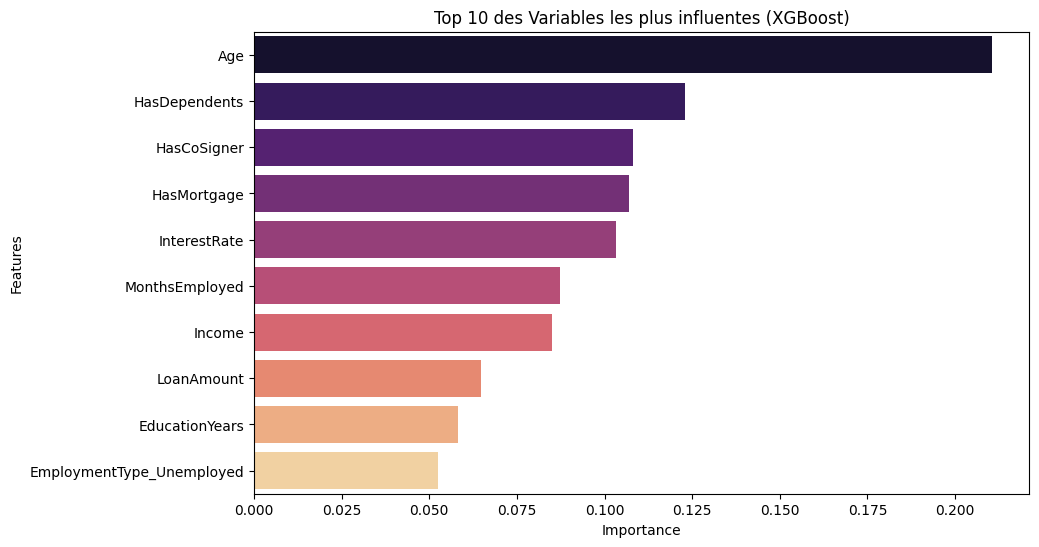

In [68]:
print("=== Feature Importance (XGBoost) ===")

feature_importances = pd.Series(xgb_model.feature_importances_, index=X2_train.columns)
feature_importances = feature_importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="magma")
plt.title("Top 10 des Variables les plus influentes (XGBoost)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

We found a very agressiv model : 64% recall for class 1. Best model of this parameter so far !

## 4.2 Deep learning

### 1. Librairies importation

In [69]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils import class_weight



### 2. Construction of the network

In [98]:
model_dl = Sequential()

model_dl.add(Dense(128, activation='relu', input_shape=(X2_train.shape[1],)))
model_dl.add(BatchNormalization())
model_dl.add(Dropout(0.3))

model_dl.add(Dense(64, activation='relu'))
model_dl.add(BatchNormalization())
model_dl.add(Dropout(0.3))

model_dl.add(Dense(32, activation='relu'))
model_dl.add(Dropout(0.2))

model_dl.add(Dense(1, activation='sigmoid'))

model_dl.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [99]:
y_pred_probs = model_dl.predict(X2_test)
y_pred_dl = (y_pred_probs > 0.5).astype(int)

print("\nAccuracy DL:", accuracy_score(y2_test, y_pred_dl))
print(classification_report(y2_test, y_pred_dl))
print("Confusion Matrix:\n", confusion_matrix(y2_test, y_pred_dl))

1596/1596 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step

Accuracy DL: 0.8381437242999804
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     45139
           1       0.16      0.09      0.12      5931

    accuracy                           0.84     51070
   macro avg       0.52      0.51      0.51     51070
weighted avg       0.80      0.84      0.82     51070

Confusion Matrix:
 [[42256  2883]
 [ 5383   548]]


La classe 1, comme les autres modèles fainéants, se contente de mettre faux à tout les cas ambigües, car les 0 sont en écrasante majorité.


In [72]:
weights = {0: 0.5, 1: 3.5}

On rajoute des weights, dans le but de rendre le modèle légèrement plus aggressif.

In [102]:
model_dl = Sequential()
model_dl.add(Dense(128, activation='relu', input_shape=(X2_train.shape[1],)))
model_dl.add(BatchNormalization())
model_dl.add(Dropout(0.3))

model_dl.add(Dense(64, activation='relu'))
model_dl.add(BatchNormalization())
model_dl.add(Dropout(0.3))

model_dl.add(Dense(32, activation='relu'))
model_dl.add(Dropout(0.2))

model_dl.add(Dense(1, activation='sigmoid'))

In [103]:
model_dl.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])

Au lieu de metrics=['accuracy'] (qui ne veut rien dire sur un jeu déséquilibré), on cherche une autre métrique, l'AUC : Elle va nous permettre d'évaluer réellement la capacité réelle du modèle à différencier un bon d'un mauvais payeur.

In [104]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

In [105]:
history = model_dl.fit(
    X2_train, y2_train,
    validation_data=(X2_test, y2_test),
    epochs=30,
    batch_size=256,
    callbacks=[early_stop, reduce_lr],
    class_weight=weights,
    verbose=1
)

Epoch 1/30
798/798 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - auc_2: 0.6811 - loss: 0.5631 - val_auc_2: 0.7564 - val_loss: 0.5535 - learning_rate: 0.0010
Epoch 2/30
798/798 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - auc_2: 0.7411 - loss: 0.5075 - val_auc_2: 0.7583 - val_loss: 0.5584 - learning_rate: 0.0010
Epoch 3/30
798/798 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - auc_2: 0.7425 - loss: 0.5055 - val_auc_2: 0.7588 - val_loss: 0.5592 - learning_rate: 0.0010
Epoch 4/30
798/798 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - auc_2: 0.7515 - loss: 0.5041 - val_auc_2: 0.7598 - val_loss: 0.5616 - learning_rate: 0.0010
Epoch 5/30
798/798 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - auc_2: 0.7500 - loss: 0.5021 - val_auc_2: 0.7599 - val_loss: 0.5573 - learning_rate: 0.0010
Epoch 6/30
798/798 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - auc_2: 0.7512 - loss: 0.5017 - val_auc_2: 0.7599 - val_loss: 0.5716 - learning_rate: 0.0010
Epoch 7/30
798/798 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - auc_2: 0.7544 - loss: 0.4985 - val_auc_2: 0.7598 - val_loss: 0.5476 -

In [111]:
y_pred_probs = model_dl.predict(X2_test)
y_pred_dl = (y_pred_probs > 0.5).astype(int)

1596/1596 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [112]:
print(classification_report(y2_test, y_pred_dl))
print("Confusion Matrix:\n", confusion_matrix(y2_test, y_pred_dl))

              precision    recall  f1-score   support

           0       0.94      0.72      0.82     45139
           1       0.24      0.66      0.35      5931

    accuracy                           0.71     51070
   macro avg       0.59      0.69      0.58     51070
weighted avg       0.86      0.71      0.76     51070

Confusion Matrix:
 [[32501 12638]
 [ 2002  3929]]


## 4.3 Choice of an advanced model

In [113]:
best_model = model_dl

# STEP 5. MODEL COMPARISON AND FINAL CHOICE

## 5.1 Comparison of the performances

Generated by IA Gen, all code have already been used previously in the notebook.

In [114]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

all_models = {
    "Logistic Regression (no SMOTE)": y_pred_lr,
    "Decision Tree (no SMOTE)": y_pred_tree,
    "Naive Bayes (no SMOTE)": y_pred_nb,
    "SVM Linear (no SMOTE)": y_pred_svm_lin,


    "Logistic Regression (SMOTE)": models["Logistic Regression"].predict(X2_test),
    "Decision Tree (SMOTE)": models["Decision Tree"].predict(X2_test),
    "Naive Bayes (SMOTE)": models["Naive Bayes"].predict(X2_test),
    "SVM Linear (SMOTE)": models["SVM Linear"].predict(X2_test),

    "Decision Tree (GridSearch)": y_pred_tree,
    "Bagging (Decision Tree)": y_pred_bagging_dt,
    "Random Forest": y_pred_rf,
    "Gradient Boosting": y_pred_gb,
    "Voting Classifier": y_pred_voting,
    "XGBoost": y_pred_xgb,
    "Deep Learning": y_pred_dl
}

scores = []

for model_name, y_pred in all_models.items():
    scores.append({
        "Model": model_name,
        "Accuracy": accuracy_score(y2_test, y_pred),
        "Precision_1": precision_score(y2_test, y_pred, pos_label=1),
        "Recall_1": recall_score(y2_test, y_pred, pos_label=1),
        "F1_1": f1_score(y2_test, y_pred, pos_label=1)
    })

results_df = pd.DataFrame(scores)

results_df = results_df.sort_values(by="Recall_1", ascending=False)

Sdisplay(results_df)


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



=== GLOBAL MODEL COMPARISON ===


,Model,Accuracy,Precision_1,Recall_1,F1_1
14,Deep Learning,0.713335,0.237158,0.662452,0.349275
9,Bagging (Decision Tree),0.664147,0.201140,0.636655,0.305699
13,XGBoost,0.680967,0.210720,0.636318,0.316597
8,Decision Tree (GridSearch),0.634972,0.186257,0.636149,0.288147
1,Decision Tree (no SMOTE),0.634972,0.186257,0.636149,0.288147
6,Naive Bayes (SMOTE),0.721265,0.231679,0.604451,0.334968
11,Gradient Boosting,0.785843,0.268968,0.491317,0.347629
12,Voting Classifier,0.793029,0.266391,0.445962,0.333544
4,Logistic Regression (SMOTE),0.822929,0.305840,0.413252,0.351524
7,SVM Linear (SMOTE),0.824633,0.306956,0.405497,0.349412


We can see that the best model is the Deep Learning, having roughly the best perks in every metrics and being the most equilibrated.

We can see that the best model after that are the Bagging decision tree and the XGBoost, with a 63% Class1 recall.

As a bank, using those models enures at 63% chances to detect a Loan default. Then, the bank can decide or not to keep the client.

## 5.2 Conclusion on the models

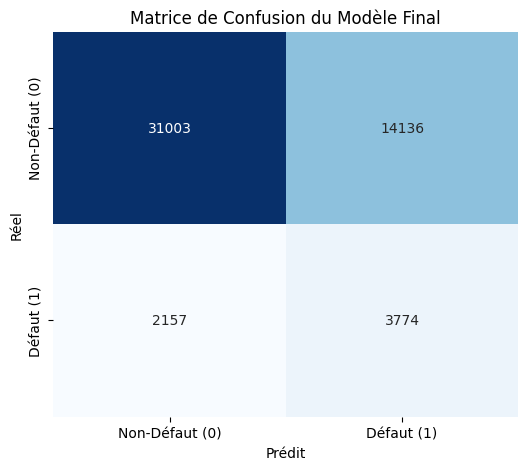

In [81]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y2_test, y_pred_xgb)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Défaut (0)', 'Défaut (1)'],
            yticklabels=['Non-Défaut (0)', 'Défaut (1)'])
plt.title("Matrice de Confusion du Modèle Final")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()